# Import

In [1]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline as make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, make_scorer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
pd.set_option('display.max_columns', None)

In [2]:
houses = pd.read_csv('/Users/merlesteffen/Documents/GitHub/HousingPrices/Data/iter-6/housing-classification-iter6.csv')

Remember to scale for a distance algorithm

# Split Data

In [3]:
X = houses.drop(columns='Expensive')
y = houses['Expensive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,BsmtFinType2,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
254,8400,70.0,1314,3,0,0,1,250,0,RL,Norm,GasA,Pave,Y,CBlock,TA,Gd,TA,TA,No,Rec,TA,NaN,20,5,6,1957,1957,0.0,922,0,392,1314,0,0,1314,1,0,1,0,1,5,1957.0,294,0,0,0,0,6,2010,255,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,Unf,TA,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1066,7837,59.0,799,3,1,0,2,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,No,Unf,TA,TA,60,6,7,1993,1994,0.0,0,0,799,799,772,0,1571,0,0,2,1,1,7,1993.0,380,40,0,0,0,5,2009,1067,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Unf,Gd,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
638,8777,67.0,796,2,0,0,0,328,0,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Fa,TA,No,Unf,TA,NaN,30,5,7,1910,1950,0.0,0,0,796,796,0,0,796,0,0,1,0,1,4,NaN,0,0,164,0,0,5,2008,639,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,1Fam,1Story,Gable,CompShg,MetalSd,Wd Sdng,None,Unf,Gd,FuseA,Typ,NaN,NaN,NaN,NaN,P,NaN,MnPrv,NaN,WD,Normal
799,7200,60.0,731,3,2,0,1,0,0,RL,Feedr,GasA,Pave,Y,BrkTil,TA,TA,Gd,TA,No,ALQ,Gd,TA,50,5,7,1937,1950,252.0,569,0,162,981,787,0,1768,1,0,1,1,1,7,1939.0,240,0,264,0,0,6,2007,800,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,Unf,Ex,SBrkr,Typ,Detchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
380,5000,50.0,1026,3,1,0,1,0,0,RL,Norm,GasA,Pave,Y,BrkTil,TA,TA,TA,TA,No,LwQ,Gd,Gd,50,5,6,1924,1950,0.0,218,0,808,1026,665,0,1691,0,0,2,0,1,6,1924.0,308,0,242,0,0,5,2010,381,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Sdng,None,Unf,TA,SBrkr,Typ,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


First obersvations: Need to replace missing values and scale. Use two pipes and column transformer.

# Prepare & Pipeline

In [14]:
categoric_features = list(X_train.select_dtypes(include=["object"]))
numeric_features = list(X_train.select_dtypes(exclude=["object"]))

In [15]:
numeric_pipe = make_pipeline(
    SimpleImputer()
)
categoric_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
)

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, numeric_features),
        ("cat_pipe_onehot", categoric_pipe, categoric_features),
    ]
)

In [17]:
# Instantiate the XGBoost classifier
logreg_clf = LogisticRegression(max_iter=10000)

# Create the pipeline
model_pipeline = make_pipeline(preprocessor, StandardScaler(), logreg_clf)

In [18]:
# Wrap iterable
for _ in tqdm(model_pipeline.fit(X_train, y_train)):
    pass

100%|██████████| 3/3 [00:00<00:00, 35246.25it/s]


In [19]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['LotArea', 'LotFrontage',
                                                   'TotalBsmtSF',
                                                   'BedroomAbvGr', 'Fireplaces',
                                                   'PoolArea', 'GarageCars',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'MSSubClass', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'Bsmt...
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'KitchenQual', 'FireplaceQu',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'BsmtFinType2', ...])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=10000))])

# Evaluate Model

In [20]:
y_train_pred = model_pipeline.predict(X_train)

accuracy_score(y_train, y_train_pred)

0.9940068493150684

In [21]:
y_test_pred = model_pipeline.predict(X_test)

accuracy_score(y_test, y_test_pred)

/Users/merlesteffen/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [25, 31] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.952054794520548

In [22]:
recall_score(y_test, y_test_pred)

0.7916666666666666

# Confusion Matrix

# Classification performance metrics

## Confusion Matrix

In [25]:
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

/Users/merlesteffen/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [25, 31] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [26]:
cm = confusion_matrix(y_train, y_train_pred)

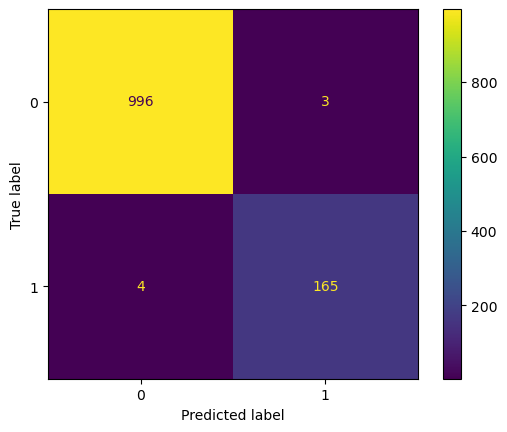

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model_pipeline.classes_)
disp.plot()

plt.show()

In [28]:
cm = confusion_matrix(y_test, y_test_pred)

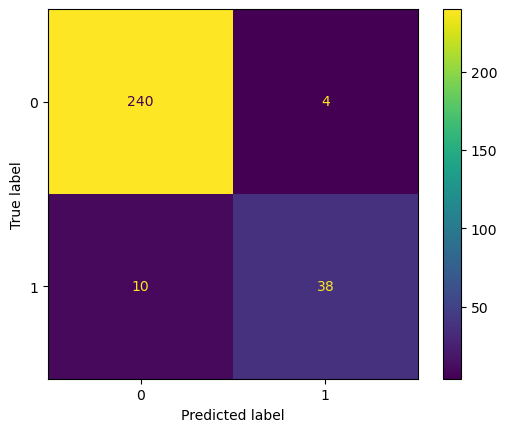

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model_pipeline.classes_)
disp.plot()

plt.show()

## Cohen’s Kappa Coefficient

In [36]:
kappa_score = cohen_kappa_score(y_test, y_test_pred)
print(kappa_score)

0.8162531463502337
